# Creating simulated RILs


Created by: Sarah Odell
Date: 05/14/2108

Generate recombinant inbred lines (RILs) based off of the NAM maize population (5 generations of selfing). Writes out into files for other building RIL vcf files or for visualization in the plots below.

Code to visualize parent donors of RIL chromosomes in an ideogram. This is modified from code by Ryan Dale (https://gist.github.com/daler/c98fc410282d7570efc3)

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
def chrom_info(chro_num):
    """chro_num: chromosome number (int)
    Outputs:
    prior: a probability distribution function for crossover events on
    that chromosome based on chromosome length and centromere position 
    (list of floats)
    end: (int) the approximate end of the chromosome, in Mb
    """
    cent = pd.read_table('B73v4centromeres.txt',sep='\t')
    cdf = cent[cent['chr']==chro_num]
    end = int(cdf['v3chr.end'].values[0])
    centstart = int(cdf['v3start'].values[0])
    centend= int(cdf['v3end'].values[0])
    centlen = int(round(cdf['v3size'].values[0]))
    if end-centend > centstart:
        longarm = end-centend
        shortarm = centstart
    else:
        longarm = centstart
        shortarm = end-centend
    diff = longarm-shortarm
    a = [i**2 for i in list(reversed(range(0,centstart+1)))]
    c = [0.0 for i in range(centlen)]
    b = [i**2 for i in range(longarm)]
    prior = a+c+b
    if len(prior)>= end:
        prior=prior[:end]
    prior = [float(j)/sum(prior) for j in prior]
    return prior,end

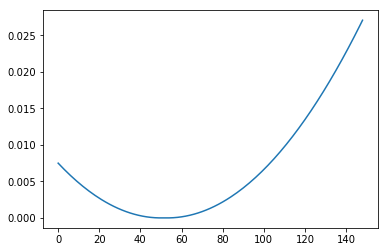

In [3]:
prior,end = chrom_info(10)
plot(prior)

In [4]:
def make_rils(n=10,parents=['B73','Oh43'],xo=6,c=10,breaks=1):
    """Simulates a RIL population chromosome
        n: number of RILS
        parents: list of length 2, names of RIL parents
        xo: Mean number of crossovers expected per individual chromosome
        (default: 6)
        c: chromosome number (int in range 1..10)
        breaks: size of possible break intervals in Mb (default: 1)
    Output: A dictionary of individual RILS. keys are integers ranging 0..n
    and values are lists, where each index is parent donor identity for that
    chromosome interval
    
    Currently, the xo number is a set integer. In the future, will change
    so that the xo number is drawn from a suitable distribution.
    """
    prior,chrlen = chrom_info(c)
    site = [i for i in range(chrlen)]
    rils = {}
    for j in range(n):
        f1=[]
        #randomly choose a parent to start with
        if numpy.random.random_sample() >= 0.5:
            donor = parents[0]
        else:
            donor = parents[1]
        site = range(chrlen)
        size = numpy.random
        draw = numpy.random.choice(site,size=xo,p=prior)
        for i in range(0,chrlen+1,breaks):
            if i in draw:
                if donor==parents[0]:
                    donor=parents[1]
                elif donor==parents[1]:
                    donor=parents[0]
            f1.append([i,donor])
        rils['R{0}'.format(j+1)]=f1
    return rils

In [5]:
def co_count(f1):
    """
    Returns the number of crossovers in an individual ril chromosome (int)
    Input:
        f1: one chromosome from the output dictionary of make_rils().
        Example: rils[1]"""
    breakpoints=0
    last = f1[0][1]
    for i in f1:
        if i[1] != last:
            breakpoints += 1
        last = i[1]
    return breakpoints

Simulates all 10 chromosomes for 10 RIL individuals (R1 through R10). 

In [17]:
rils={}
for j in range(1,11):
    ril={}
    for c in range(1,11):
        chrom = make_rils(n=1,parents=['B73','Oh43'],c=c)
        ril[c]=chrom[0]
    rils['R{0}'.format(j)] = ril

In [18]:
rils['R1'][10][:10]

[[0, 'Oh43'],
 [1, 'Oh43'],
 [2, 'B73'],
 [3, 'B73'],
 [4, 'B73'],
 [5, 'B73'],
 [6, 'B73'],
 [7, 'B73'],
 [8, 'B73'],
 [9, 'B73']]

Simulates only chromosome 10 for 10 RIL individuals.
This will be used to generate RIL VCF files later.

In [ ]:
chr10 = make_rils(n=10,parents=['B73','Oh43'],c=10)

In [19]:
chr10 = make_rils(n=1000,parents=['B73','Oh43'],c=10)

In [60]:
chr10['R552']

[[0, 'B73'],
 [1, 'B73'],
 [2, 'B73'],
 [3, 'B73'],
 [4, 'B73'],
 [5, 'B73'],
 [6, 'B73'],
 [7, 'B73'],
 [8, 'B73'],
 [9, 'B73'],
 [10, 'B73'],
 [11, 'B73'],
 [12, 'B73'],
 [13, 'B73'],
 [14, 'B73'],
 [15, 'B73'],
 [16, 'B73'],
 [17, 'B73'],
 [18, 'B73'],
 [19, 'B73'],
 [20, 'B73'],
 [21, 'B73'],
 [22, 'B73'],
 [23, 'B73'],
 [24, 'B73'],
 [25, 'B73'],
 [26, 'B73'],
 [27, 'B73'],
 [28, 'B73'],
 [29, 'B73'],
 [30, 'B73'],
 [31, 'B73'],
 [32, 'B73'],
 [33, 'B73'],
 [34, 'B73'],
 [35, 'B73'],
 [36, 'B73'],
 [37, 'B73'],
 [38, 'B73'],
 [39, 'B73'],
 [40, 'B73'],
 [41, 'B73'],
 [42, 'B73'],
 [43, 'B73'],
 [44, 'B73'],
 [45, 'B73'],
 [46, 'B73'],
 [47, 'B73'],
 [48, 'B73'],
 [49, 'B73'],
 [50, 'B73'],
 [51, 'B73'],
 [52, 'B73'],
 [53, 'B73'],
 [54, 'B73'],
 [55, 'B73'],
 [56, 'B73'],
 [57, 'B73'],
 [58, 'B73'],
 [59, 'B73'],
 [60, 'B73'],
 [61, 'B73'],
 [62, 'B73'],
 [63, 'B73'],
 [64, 'B73'],
 [65, 'B73'],
 [66, 'B73'],
 [67, 'B73'],
 [68, 'B73'],
 [69, 'B73'],
 [70, 'B73'],
 [71, 'B73'],
 [

In [38]:
def write_rils(ril,out,c=10,cnum=10):
    """Writes out dictionary output of make_rils() to a file with format:
        chr   start   end     sample1   sample2   ...
        10    0       999999  Oh43      B73
        10    1000000 1999999 Oh43      B73
        10    2000000 2999999 Oh43      Oh43
        10    3000000 3999999 Oh43      Oh43
    out: (str) name of output file    
    """
    p1 = 'B73'
    p2 = 'Oh43'
    txt = 'chr\tstart\tend\t'
    for k in ril.keys():
        txt+='{0}\t'.format(k)
    txt+='\n'
    if cnum==1:
        breaks = len(ril['R1'])
        for n in range(breaks):
            start = int(ril['R1'][n][0]*1e6)
            end = int((ril['R1'][n][0]+1)*1e6)-1
            txt+='{0}\t{1}\t{2}'.format(c,start,end)
            for m in ril.keys():
                txt+='\t{0}'.format(ril[m][n][1])
            txt+='\n'      
    else:
        for i in range(0,cnum+1):
            breaks = len(ril['R1'][i])
            for n in range(breaks):
                start = int(ril['R1'][i][n][0]*1e6)
                end = int((ril['R1'][i][n][0]+1)*1e6)-1
                txt+='{0}\t{1}\t{2}'.format(i,start,end)
                for m in ril.keys():
                    txt+='\t{0}'.format(ril[m][i][n][1])
                txt+='\n'           
    with open(out,'w') as outfile:
        outfile.write(txt)

In [39]:
write_rils(chr10,'1000_RILS.txt',cnum=1)

In [6]:
def co_loc(f1,c=10):
    """
    Returns regions of a chromosome received from particular parents
    in an individual ril chromosome (int)
    Input:
        f1: one chromosome from the output dictionary of make_rils().
        Example: rils[1]"""
    locs=[]
    last = f1[1]
    counter = f1[0][0]
    for i in f1:
        if i[1] != last[1]:
            start = int(i[0]*1e6)-1
            end = int((i[0])*1e6)
            locs.append([c,counter,start,last[1]])
            counter=end
        last = i
    locs.append([c,counter,int((f1[-1][0]+1)*1e6)-1,last[1]])
    return locs

In [11]:
rilsim = pd.read_table('../RILSim_ideo.txt',sep='\t')
rilsim.head()

,chr,start,end,donor
0,4,0.0,1.0,Oh43
1,4,1.0,2.0,Oh43
2,4,2.0,3.0,Oh43
3,4,3.0,4.0,Oh43
4,4,4.0,5.0,Oh43


In [81]:
co_loc(chr10['R1'])

[[10, 0, 111999999, 'Oh43'],
 [10, 112000000, 115999999, 'B73'],
 [10, 116000000, 134999999, 'Oh43'],
 [10, 135000000, 137999999, 'B73'],
 [10, 138000000, 141999999, 'Oh43'],
 [10, 142000000, 145999999, 'B73'],
 [10, 146000000, 149999999, 'Oh43']]

In [79]:
(chr10['R1'][-1][0]+1)*1e6 - 1

149999999.0

In [66]:
def write_co(f1,out,c):
    locs = co_loc(f1,c)
    txt='chr\tstart\tend\tdonor\n'
    for i in locs:
        txt+='{0}\t{1}\t{2}\t{3}\n'.format(i[0],i[1],i[2],i[3])
    with open(out,'w') as outfile:
        outfile.write(txt)

## Visualizing RILs 

Now that we've created the RIL population, we may want to see how crossovers have been distributed, and which parents have donated to which regions of the chromosomes. Below, I make a ideogram showing the parental contributions for all ten chromosomes of one RIL. This can be modified to show only one chromosome for all the RILs, etc.

In [69]:
def make_ideotable(ril,out):
    """ Writes out file in format for drawing ideogram plots
    ril: 
    out: name of outfile (str)
    """
    txt = 'chr\tstart\tend\tdonor\n'
    for j in ril:
        for i in ril[j]:
            txt+='{0}\t{1}\t{2}\t{3}\n'.format(j,i[0],i[0]+100,i[1])
    with open(out,'w') as outfile:
        outfile.write(txt)

In [70]:
subset = rils['R1']
make_ideotable(subset,'R1.txt')

In [29]:
ril_count=10

***This code is modified from Ryan Dale. Link to their github is at top.***

In [30]:
"""
Demonstrates plotting chromosome ideograms and genes (or any features, really)
using matplotlib.
1) Assumes a file from UCSC's Table Browser from the "cytoBandIdeo" table,
saved as "ideogram.txt". Lines look like this::
    #chrom  chromStart  chromEnd  name    gieStain
    chr1    0           2300000   p36.33  gneg
    chr1    2300000     5300000   p36.32  gpos25
    chr1    5300000     7100000   p36.31  gneg
2) Assumes another file, "ucsc_genes.txt", which is a BED format file
   downloaded from UCSC's Table Browser. This script will work with any
   BED-format file.
"""
from matplotlib import pyplot as plt
from matplotlib.collections import BrokenBarHCollection


# Here's the function that we'll call for each dataframe (once for chromosome
# ideograms, once for genes).  The rest of this script will be prepping data
# for input to this function
#

def chromosome_collections(df, y_positions, height,  **kwargs):
    """
    Yields BrokenBarHCollection of features that can be added to an Axes
    object.
    Parameters
    ----------
    df : pandas.DataFrame
        Must at least have columns ['chrom', 'start', 'end', 'color']. If no
        column 'width', it will be calculated from start/end.
    y_positions : dict
        Keys are chromosomes, values are y-value at which to anchor the
        BrokenBarHCollection
    height : float
        Height of each BrokenBarHCollection
    Additional kwargs are passed to BrokenBarHCollection
    """
    del_width = False
    if 'width' not in df.columns:
        del_width = True
        df['width'] = df['end'] - df['start']
    for chrom, group in df.groupby('chrom'):
        print chrom
        yrange = (y_positions[chrom], height)
        xranges = group[['start', 'width']].values
        yield BrokenBarHCollection(
            xranges, yrange, facecolors=group['colors'], **kwargs)
    if del_width:
        del df['width']
        
# Height of each ideogram
chrom_height = 1

# Spacing between consecutive ideograms
chrom_spacing = 1

# Height of the gene track. Should be smaller than `chrom_spacing` in order to
# fit correctly
gene_height = 0.4

# Padding between the top of a gene track and its corresponding ideogram
gene_padding = 0.1

# Width, height (in inches)
figsize = (6, 8)

# Decide which chromosomes to use ***### EDIT HERE for no. of RILS ###***
chromosome_list = [i for i in range(1, ril_count+1)]

# Keep track of the y positions for ideograms and genes for each chromosome,
# and the center of each ideogram (which is where we'll put the ytick labels)
ybase = 0
chrom_ybase = {}
gene_ybase = {}
chrom_centers = {}

for chrom in chromosome_list[::-1]:
    chrom_ybase[chrom] = ybase
    chrom_centers[chrom] = ybase + chrom_height / 2.
    gene_ybase[chrom] = ybase - gene_height - gene_padding
    ybase += chrom_height + chrom_spacing

In [71]:
# Read in file from output of make_ideogram()
ideo = pd.read_table(
    'R1.txt',
    skiprows=1,
    names=['chrom', 'start', 'end', 'donor']
)

# Filter out chromosomes not in our list
ideo = ideo[ideo.chrom.apply(lambda x: x in chromosome_list)]
ideo['end'] = pd.to_numeric(ideo['end'])
ideo['start']=pd.to_numeric(ideo['start'])
# Add a new column for width
ideo['width'] = ideo.end - ideo.start

Here I wanted to generate different colors for different parents. This is using the founders of the NAM population, but other parent names can be substituted.

In [1]:
nam_parents={'Z001':'B97',
 'Z002': 'CML103',
 'Z003':'CML228',
 'Z004': 'CML247',
 'Z005':'CML277',
 'Z006':'CML322',
 'Z007':'CML333',
 'Z008':'CML52',
 'Z009':'CML69',
 'Z010':'Hp301',
 'Z011':'Il14H',
 'Z012':'Ki11',
 'Z013':'Ki3',
 'Z014':'Ky21',
 'Z015':'M162W',
 'Z016':'M37W',
 'Z018':'Mo18W',
 'Z019':'MS71',
 'Z020':'NC350',
 'Z021':'NC358',
 'Z022':'Oh43',
 'Z023':'Oh7B',
 'Z024':'P39',
 'Z025':'Tx303',
 'Z026':'Tzi8'}

In [4]:
nam_parents.values()

['CML322',
 'CML333',
 'Oh43',
 'Oh7B',
 'CML52',
 'CML69',
 'CML103',
 'CML228',
 'Tzi8',
 'B97',
 'NC350',
 'NC358',
 'CML247',
 'CML277',
 'M162W',
 'Ky21',
 'M37W',
 'Il14H',
 'Hp301',
 'Ki3',
 'Ki11',
 'MS71',
 'Mo18W',
 'P39',
 'Tx303']

In [18]:
def make_rgb():
    """Randomly generates rgb colors for each NAM parent for plotting 
    ideograms. Output is a dictionary with parent names as keys and 
    rgb lists as values"""
    color_lookup = {'Cent': (0.0, 0.0, 0.0),'B73': (.4, .4, .4),}
    for i in nam_parents.values():
        rgb = numpy.random.random_sample(3)
        rgb = [round(j,2) for j in rgb]
        #rgb=tuple(round(numpy.random.random_sample(3),2))
        color_lookup[i]=rgb
    return color_lookup

In [35]:
color_lookup = {'Cent': [0.0, 0.0, 0.0],
 'B73': [0.4, 0.4, 0.4],
 'B97': [0.47, 0.53, 0.98],
 'CML103': [0.58, 0.52, 0.2],
 'CML228': [0.13, 0.7, 0.43],
 'CML247': [0.38, 0.1, 0.56],
 'CML277': [0.68, 0.78, 0.87],
 'CML322': [0.45, 0.09, 0.07],
 'CML333': [0.41, 0.55, 0.37],
 'CML52': [0.72, 0.69, 0.3],
 'CML69': [0.71, 0.24, 0.01],
 'Hp301': [0.42, 0.86, 0.76],
 'Il14H': [0.66, 0.43, 0.64],
 'Ki11': [0.82, 0.63, 0.12],
 'Ki3': [0.89, 0.69, 0.79],
 'Ky21': [0.74, 0.19, 0.9],
 'M162W': [0.77, 0.71, 0.79],
 'M37W': [0.27, 1.0, 0.89],
 'MS71': [0.74, 0.88, 0.13],
 'Mo18W': [0.4, 0.96, 0.25],
 'NC350': [0.92, 0.76, 0.09],
 'NC358': [0.22, 0.98, 0.98],
 'Oh43': [0.58, 0.96, 0.87],
 'Oh7B': [0.23, 0.22, 0.86],
 'P39': [0.28, 0.21, 0.97],
 'Tx303': [0.12, 0.68, 0.75],
 'Tzi8': [0.83, 0.48, 0.87]}

1
2
3
4
5
6
7
8
9
10


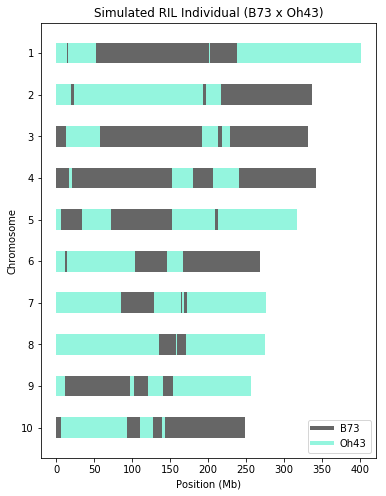

In [75]:
# Add a new column for colors
ideo['colors'] = ideo['donor'].apply(lambda x: color_lookup[x])

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)

# Now all we have to do is call our function for the ideogram data...
#print("adding ideograms...")
for collection in chromosome_collections(ideo, chrom_ybase, chrom_height):
    ax.add_collection(collection)

# Axes tweaking
ax.set_yticks([chrom_centers[i] for i in chromosome_list])
ax.set_yticklabels(chromosome_list)
ax.axis('tight')
ax.set_xlabel('Position (Mb)')
ax.set_ylabel('Chromosome')
ax.set_title('Simulated RIL Individual (B73 x Oh43)')
legend(ideo['colors'],loc='lower right')

legend_elements = [Line2D([0], [0], color=(0.4, 0.4, 0.4), lw=4,label='B73'),
                Line2D([0], [0], color=(0.58, 0.96, 0.87), lw=4,label='Oh43')]
ax.legend(handles=legend_elements,loc='lower right')

plt.show()

This is a work in progress. I'd like to also add bars showing centromere locations, and improve the crossover generation to make it more biologically realistic.

The write_rils() output file can be used to generate pseudosequences or combine vcf files (I will post code for this second one soon), to deal more with sequences instead of just breakpoint locations!